In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime
import time

### Team Strategy Chosen: Market Beat

Overview of our strategy:

The market beat strategy that we demonstrate below is based off of 4 key metrics, those being beta, sharpe ratio, moving average, and p/e ratio. These metrics were carefully considered and selected, based on their relevance to the lessons that we have been learning in CFM, as well as their synchronisity with each other. 

First when considering a market beat strategy, we determined there was two routes we could go, either a strategy in which we buy against the market in order to make a return, or buy with the market, and use the fact that the market is going to up to make a bigger profit. We decided on the latter, as historically over the long-term the stock market (in this case the S&P and TSX index) grows at rate of around 7-8% per year.

Next was determining which metric we wanted to place the most focus on. Based on what we learned in class, we decided that beta would be a great place to cut down on a lot of stocks. Since we are buying stocks that positively correlate with the market, we want to find stocks with values of beta that are greater than 1. What this means is that for every 1 percent the market goes up, the stock would increase by more than 1 percent. Creating a portfolio of these stocks would ensure that when the market goes up, the portfolio would go up a lot more.

As mentioned above, one of important things we considered was synchronisity between the metrics we chose. While beta gives us a good starting point, it is a little risky. What we wanted to consider next was whether the risk we were taking with the stocks with a high beta was worth it. As we learned in class, the sharpe ratio is a ratio that measures the risk-adjusted return. When left with stocks with high beta, this tandem of metrics produces stocks that lower the potential of a single stock weighing down the entire portfolio. 

Next we moved into metrics that were not discussed extensively in class, but were still quite relevant to this discussion. those being the moving average and p/e ratio. When discussing the moving average, we decided to compare the long-term and short-term moving average to each other. The reasoning for this is to filter out stocks that may be on a major trend downwards in terms of how the stock performed historically to how it is performing now. If the stock significantly performs worse now than it did before, it is indicative that the stock price is trending downwards, and thus is not going to have a positive impact on the end portfolio. Those that have a greater short term moving average than long-term moving average show signs of growth, which is better for the market beat strategy.

Finally, the last metric is the p/e ratio of the stock. P/E ratio measures how valuable a company is in the eyes of the market compared to its actual value (compares the price of the stock (p) to the earnings per share (e)). A high p/e ratio usually correspond to companies that are expected to expand rapidly, even if they do not generate substantial profits. A high P/E ratio can signal that the market expects significant growth, which aligns with the objectives of our growth-focused strategy. Sometimes a high p/e can signify that a company is overvalued, which is why we use the other metrics, specifically the sharpe ratio and even to an extent the moving average, to filter out companies that may be overvalued of the market instead of actually having potential for growth. 

However, since the p/e ratio is not very reliable, rather than filtering out stocks based on this metric, we use it to determine the weighting of our portfolio. At the end of filtering the stocks with the other 3 metrics, we rank the remaining stocks on each of the 4 categories and score them, giving the highest score to the stock that is highest in the most categories, and the lowest score to the stock that is relatively lower than the other stocks in most of the categories. Then we compare this score to the total score of all the stocks in the portfolio to determine the weighting of the portfolio. This ensures that the stocks that align the best with our metrics make up most of the portfolio, and those that do not, make up less of the portfolio.

The following is the code that goes through each of these steps. At the end we also produce a graph to show how this portfolio would perform historically starting from September of last year, to reinforce whether our strategy is effective.

## 1. Filtering

This section involves reading a list of stock tickers from a CSV file and then filtering them based on specific criteria. <br>
1. Stocks are filtered to include only those priced in USD or CAD. <br> <br>
2. The code calculates the average monthly trading volume for each stock over the period from October 1, 2023, to September 30, 2024. Only stocks with an average monthly volume of at least 100,000 shares are included. <br> <br>
3. Any month that does not have at least 18 trading days is excluded from the average volume calculation.<br>


In [2]:
# Read the stock symbols from CSV
stock_csv = "Tickers_Example.csv"
stocks = pd.read_csv(stock_csv, header=None)
stocks.columns = ['Column1']

# Define start and end dates for volume-filtering
start_date = "2023-10-01"
end_date = "2024-09-30"

stock_list = []

# Loop through each ticker
for tckr in stocks["Column1"]:
    try: 
        stock = yf.Ticker(tckr)

        # Check if the stock has 'currency' in the info
        if "currency" in stock.info.keys():
            stock_currency = stock.info["currency"]
            
            # Get the historical data for the ticker with daily intervals (so we can count the trading days)
            stock_hist = stock.history(start=start_date, end=end_date, interval="1d")
            time.sleep(0.3)

            # Create a 'YearMonth' column
            stock_hist['YearMonth'] = stock_hist.index.to_period('M')

            # Group by the 'YearMonth' column
            grouped = stock_hist.groupby('YearMonth')

            # Initialize an empty list to store valid months' data
            valid_months = []

            for period, group in grouped:
                # Count trading days by counting non-null values in the 'Volume' column
                trading_days = group['Volume'].count()

                # Calculate the average volume for the month
                avg_volume = group['Volume'].mean()

                # If there are at least 18 trading days, consider this month
                if trading_days >= 18:
                    valid_months.append(avg_volume)

            # Check if there are valid months and calculate the overall average volume
            if valid_months:
                overall_avg_volume = sum(valid_months) / len(valid_months)

                # Check if the currency is USD or CAD, and if the average volume exceeds 100,000
                if (stock_currency == "USD" or stock_currency == "CAD") and overall_avg_volume > 100000:
                    stock_list.append(tckr)
    except:
        pass

/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_13401/3043986432.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_hist['YearMonth'] = stock_hist.index.to_period('M')
/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_13401/3043986432.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_hist['YearMonth'] = stock_hist.index.to_period('M')
/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_13401/3043986432.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_hist['YearMonth'] = stock_hist.index.to_period('M')
/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_13401/3043986432.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock_hist['YearMonth'] = stock_hist.index.to_period('M')
/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_1

## 2. Choosing Stocks

### i. Beta

Beta value measures a stock's volatility and sensitivity to market movements relative to an index. <br><br>
A Beta greater than 1 means the stock tends to have higher volatility, while a Beta less than 1 indicates that the stock is less volatile than the market. 
<br><br>
In this section, historical close prices for both indices are retrieved for the period from September 1, 2024, to the current date.<br> Then the daily percentage returns are calculated to measure short-term market movements.<br>After that, the average returns of the two indices and their variance are computed.<br>
<br>
We get a DataFrame of the stocks that have the highest beta values. This gives us a portfolio that has positively correlated stocks and is volatile compared to the market. This also implies that the portfolio has the least market diversification and the highest volume of change. <br>

In [3]:
# Redefine start and end dates
start_date = "2024-11-01"
end_date = datetime.today()

# Defining market indices to compare against
MarketIndex1 = "^GSPTSE"  # TSX 60 
MarketIndex2 = "^GSPC"  # S&P 500

# Retrieving historical close prices for the market indices
market_hist1 = yf.Ticker(MarketIndex1).history(start=start_date, end=end_date)['Close']
market_hist2 = yf.Ticker(MarketIndex2).history(start=start_date, end=end_date)['Close']

# Calculating daily percentage returns for the market indices
market_hist1["Returns"] = market_hist1.pct_change() * 100
market_hist2["Returns"] = market_hist2.pct_change() * 100

# Calculating the average daily returns of the two market indices
market_avg_returns = (market_hist1["Returns"] + market_hist2["Returns"]) / 2

# Calculating the variance of the average market returns
market_var = market_avg_returns.var()

# beta_val returns the beta of the ticker inputted
# Beta measures a stock's volatility relative to the market
def beta_val(stock_returns):
    df = pd.DataFrame({"Market Returns": market_avg_returns, "Stock Returns": stock_returns}).dropna()

    # Calculating the covariance between stock returns and market returns
    covariance = df.cov().iloc[0, 1]

    # Return the ratio of covariance to market variance (beta)
    return covariance / market_var


# betas_list takes a list of tickers and returns a dictionary with tickers as keys and their betas as values
def betas_list(ticker_list):
    betas = {} # Initialize an empty dictionary to store betas

    # Looping through each ticker in the list
    for ticker in ticker_list:
        stock_hist = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
        time.sleep(0.3)

        # Calculate daily percentage returns for the stock
        ticker_returns = stock_hist.pct_change()*100 
        betas[ticker] = beta_val(ticker_returns)

    # Return a dictionary of betas
    return betas

# Calculate beta values for all stocks in the stock_list
all_betas = betas_list(stock_list)

In [4]:
beta_dict = betas_list(all_betas.keys())

# Convert the dictionary of beta values into a DataFrame
beta_df = pd.DataFrame.from_dict(beta_dict, orient='index')

# Rename the column in the DataFrame to 'Beta'
beta_df.columns = ['Beta']

# Set the index name of the DataFrame to 'Ticker'
beta_df.index.name = 'Ticker'

In [5]:
#Sorting the dictionary from lowest beta to highest beta
sorted_beta_df = beta_df.sort_values('Beta').copy()

# Checking if there are fewer than 12 stocks with a beta value >= 1
if (len(sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1].index) < 12):
    # If there are fewer than 12 stocks, select the 15 stocks with the highest beta values
    eligible_stocks = sorted_beta_df.iloc[-15:]

# Checking if there are more than 30 stocks with a beta value >= 1
elif ((len(sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1].index) > 30)): 
    # If there are more than 30 stocks, select the 30 stocks with the highest beta values
    eligible_stocks = sorted_beta_df.iloc[-30:] 
else:
    # Otherwise select all stocks with beta values >= 1
    eligible_stocks = sorted_beta_df.loc[sorted_beta_df['Beta'] >= 1]

### ii. Sharpe Ratio

The Sharpe Ratio measures the return of an investment relative to its risk. A higher Sharpe ratio indicates a better risk-adjusted return, meaning the stock or portfolio is delivering more reward for the risk taken. <br><br>It helps identify stocks that offer the best potential for growth, with minimal unnecessary risk.

In [6]:
# calculate_sharpe_ratio calculates the Sharpe Ratio for a given stock ticker and risk free rate
def calculate_sharpe_ratio(ticker, risk_free_rate):

    # Getting historical closing prices for the stock
    stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
    time.sleep(0.3)

    # Calculating daily percentage returns for the stock
    stock_returns = stock_data.pct_change()

    # Calculating the average daily return of the stock
    average_return = stock_returns.mean()

    # Calculating the standard deviation of the stock's daily returns
    std_deviation = stock_returns.std()

    # Calculating the Sharpe Ratio using the formula: (Average Return - Risk-Free Rate) / Standard Deviation
    sharpe_ratio = (average_return - risk_free_rate) / std_deviation
    return sharpe_ratio

# Initializing a dictionary to store the Sharpe Ratio
sharpe_ratios = {}

# Looping through each eligible stock ticker and calculating its Sharpe Ratio
for ticker in eligible_stocks.index:
    sharpe_ratios[ticker] = calculate_sharpe_ratio(ticker, 0)

# Adding the calculated Sharpe Ratios to the eligible_stocks DataFrame
for ticker, sharpe_ratio in sharpe_ratios.items():
    eligible_stocks.loc[ticker, "Sharpe Ratio"] = sharpe_ratio

# Sorting the eligible stocks by their Sharpe Ratio in descending order
eligible_stocks = eligible_stocks.sort_values('Sharpe Ratio', ascending=False)

# Checking if there are fewer than 12 stocks with a positive Sharpe Ratio
if (len(eligible_stocks[eligible_stocks['Sharpe Ratio'] > 0]) < 12):
    # If there are fewer than 12 stocks that have Sharpe Ratios greater than 0, select the top 12 stocks 
    eligible_stocks = eligible_stocks.iloc[:12]
else:
    # Otherwise drop stocks with a Sharpe Ratio less than 0 from the DataFrame
    lowSharpe = eligible_stocks[eligible_stocks['Sharpe Ratio'] <= 0].index
    eligible_stocks.drop(lowSharpe, inplace=True)

/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_13401/939839452.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_stocks.loc[ticker, "Sharpe Ratio"] = sharpe_ratio


### iii. Exponential Moving Averages (EMAs)

An exponential moving average (EMA) filters out the noise from random price fluctuations, placing a greater weight and significance on the most recent data points.

To understand whether a stock is headed upwards or downwards, we will compare the short-term exponential moving average (STEMA) with the long-term exponential moving average (LTEMA).

When the STEMA crosses above the LTEMA, this suggests positive momentum and the stock is likely headed in an upwards direction. The opposite holds true as well.

Thus, we can calculate the variance in EMAs (STEMA-LTEMA) --> the higher the variance, the better the stock is predicted to do in the foreseen future.

In [7]:
# Compare each stock's short-term exponential moving average with its long-term exponential moving average
# Looping through each stock ticker in the eligible_stocks DataFrame
for tckr in eligible_stocks.index:
    try:
        # Download stock history with yfinance
        ticker = yf.Ticker(tckr)
        ticker_hist = ticker.history(start=start_date, end=end_date)
        time.sleep(0.3)

        # Calculating the short-term Exponential Moving Average (EMA) with a span of 5
        ticker_hist['EMA Short'] = ticker_hist['Close'].ewm(span=5, adjust=True, min_periods=5).mean()

        # Calculating the long-term Exponential Moving Average (EMA) with a span of 50
        ticker_hist['EMA Long'] = ticker_hist['Close'].ewm(span=50, adjust=True, min_periods=5).mean()

        # If there is an error with the ticker, assign Variance in EMA with arbitrary number -10000
        if ticker_hist.empty:
            eligible_stocks.loc[tckr, 'Variance in EMA'] = -10000  # Assigning an extreme negative value for sorting

        else:
            # Calculating the variance between the last short-term and long-term EMA values
            eligible_stocks.loc[tckr, 'Variance in EMA'] = ticker_hist['EMA Short'].iloc[len(ticker_hist)-1] - ticker_hist['EMA Long'].iloc[len(ticker_hist)-1]
    except:
        # Go to the next ticker if there is an error
        pass

# Sorting the eligible stocks in descending order of 'Variance in EMA'
eligible_stocks = eligible_stocks.sort_values('Variance in EMA', ascending=False)

# Checking if there are less than 12 stocks with a 'Variance in EMA' greater than -2
if (len(eligible_stocks[eligible_stocks['Variance in EMA'] > -2]) < 12):
    # If less than 12 stocks meet the condition, select the top 12 stocks
    eligible_stocks = eligible_stocks.iloc[:12]

# Check if there are more than 24 stocks with a 'Variance in EMA' greater than -2
elif (len(eligible_stocks[eligible_stocks['Variance in EMA'] > -2]) > 24):
    # If more than 24 stocks meet the condition, select the top 24 stocks
    eligible_stocks = eligible_stocks.iloc[:24]
    
else:
    # Otherwise, drop stocks with 'Variance in EMA' less than or equal to -2
    lowReturns = eligible_stocks[eligible_stocks['Variance in EMA'] <= -2].index
    eligible_stocks.drop(lowReturns, inplace=True)

# Droping any rows with missing values from the eligible_stocks DataFrame
eligible_stocks.dropna(axis=0, inplace=True)

### iv. P/E Ratio

This is used for assessing whether a stock is overvalued or undervalued relative to its earnings. A high P/E ratio could indicate that a stock is overvalued or that investors are expecting high growth in the future. On the other hand, a low P/E ratio might suggest that a stock is undervalued or underperforming. <br><br>

By filtering for stocks with a reasonable P/E ratio, we can avoid those that are overpriced relative to their earnings potential. This ensures that our portfolio isn't overly exposed to high-risk and high-valuation stocks.<br><br>

It is also useful for comparing stocks within the same industry or sector. Different industries can have different average P/E ratios due to varying growth rates, capital requirements, and market conditions.<br>

In [8]:
# Dictionary mapping sector names to their respective ETF tickers
sector_etfs = {
    "Technology": "XLK",
    "Healthcare": "XLV",
    "Financial Services": "XLF",
    "Consumer Cyclical": "XLY",
    "Energy": "XLE",
    "Utilities": "XLU",
    "Consumer Defensive": "XLP",
    "Industrials": "XLB",
    "Real Estate": "XLRE",
    "Communication Services": "XLC"
}

# Function to get P/E ratio for sector ETFs
def get_sector_pe_data(sector_etfs):
    sector_pe_data = {}

    # Looping through each sector and its respective ETF ticker
    for sector, etf in sector_etfs.items():
        
        # Fetch ETF data
        sector_etf = yf.Ticker(etf)
        info = sector_etf.info
        
        # Get the P/E ratio of the sector ETF
        pe_ratio = info.get('trailingPE', None)
        
        if pe_ratio:
            sector_pe_data[sector] = pe_ratio
    
    return sector_pe_data

# Get sector P/E data for each ETF
sector_pe_data = get_sector_pe_data(sector_etfs)

In [9]:
# get_stock_pe gets the P/E ratio and sector for a list of tickers
def get_stock_pe(tickers):
    stock_data = {}

    # Looping through each ticker in the list of tickers
    for ticker in tickers:
        # Get stock info
        stock = yf.Ticker(ticker)
        info = stock.info

        # Get the sector of the stock and default to 'N/A' if it is not available
        sector = info.get('sector', 'N/A')
        pe_ratio = info.get('trailingPE', None)  # trailing P/E ratio
        
        # Add data to dictionary
        if (sector != 'N/A'): 

            # If P/E ratio is available, add sector and P/E to the dictionary
            if pe_ratio:
                stock_data[ticker] = {'sector': sector, 'PE': pe_ratio}
                
            else:
                # Otherwise, set P/E ratio to None
                stock_data[ticker] = {'sector': sector, 'PE': None}
        else:
            # If sector is 'N/A' and the P/E ratio is available
            if pe_ratio:
                stock_data[ticker] = {'sector': 'N/A', 'PE': pe_ratio}

            else:
                # Otherwise, set P/E ratio to None
                stock_data[ticker] = {'sector': 'N/A', 'PE': None}

    # Returning the dictionary containing the sector and P/E ratio
    return stock_data

# Calling the function for all eligible stocks
stock_pe = get_stock_pe(eligible_stocks.index)

In [10]:
# compare_pe_to_sector compares the P/E ratio of individual stocks to their sector's average P/E ratio
def compare_pe_to_sector(stock_data, sector_pe_data):

    # Looping through each stock in the stock_data dictionary
    for tckr, data in stock_data.items():

        # Extracting the sector and P/E ratio of the stock
        sector = data['sector']
        pe = data['PE']
        
        # If the stock has a valid sector and P/E ratio
        if sector != 'N/A' and pe is not None:

            # Getting the average P/E ratio for the sector from sector_pe_data
            pe_sector_avg = sector_pe_data.get(sector, None)

            # If the sector's P/E ratio is available then calculate the difference between stock's P/E and sector's P/E
            if pe_sector_avg is not None:
                eligible_stocks.loc[tckr, "comparisonPE"] = pe - pe_sector_avg

        # If no valid sector or P/E ratio is found, set comparisonPE to 0
        else:
            eligible_stocks.loc[tckr, "comparisonPE"] = 0

# Calling the function to compare each stock's P/E ratio to its sector's P/E ratio
compare_pe_to_sector(stock_pe, sector_pe_data)

for tckr in eligible_stocks.index:

    # If the comparisonPE value is 0, replace it with the median of the column
    if eligible_stocks.loc[tckr, "comparisonPE"] == 0:
        eligible_stocks.loc[tckr, "comparisonPE"] = eligible_stocks["comparisonPE"].median()

In [11]:
# Display eligible stocks with information on betas, sharpe ratio, variance in EMA, and P/E ratio
eligible_stocks

,Beta,Sharpe Ratio,Variance in EMA,comparisonPE
Ticker,,,,
AMZN,1.746411,0.148307,4.065594,18.047270
AXP,1.692606,0.126820,1.234985,4.814024
BB.TO,2.143681,0.282610,1.190330,-0.550457
C,1.663896,0.163500,0.340814,3.029302
SHOP.TO,2.557193,0.212005,0.300190,61.554580
PYPL,1.565569,0.142913,-0.726527,3.393833
BAC,1.497078,0.090250,-1.091056,-1.100915
USB,1.740837,0.022650,-1.712601,-2.307904
QCOM,1.566955,-0.076473,-2.924644,-21.255445


## Ranking

This section ranks the stocks selected based on different metrics and assigns an overall score to help determine its weightage in the portfolio. <br><br>
The metrics used for ranking are Beta value, Sharpe ratio, Exponential Moving Averages and the P/E ratios which reflect return, risk, volatility, and valuation. <br><br>
Each metric is used to sort the stocks in descending order. The stocks are assigned points based on their positions in each sorted list. <br><br>
After aggregating scores across all metrics, the stocks are sorted in descending order of their total "Ranking" score.<br>


In [12]:
# Initializing a new column "Ranking" in the eligible_stocks DataFrame with a default value of 0
eligible_stocks['Ranking'] = 0

# Getting the length of the eligible_stocks DataFrame
length = len(eligible_stocks.index)

# Sorting based on "Beta"
eligible_stocks = eligible_stocks.sort_values("Beta", ascending=False)

# Assigning a rank based on the sorted "Beta" values
for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

# Sorting based on "Sharpe Ratio"
eligible_stocks = eligible_stocks.sort_values("Sharpe Ratio", ascending=False)

# Assigning a rank based on the sorted "Sharpe Ratio" values
for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

# Sorting based on "Variance in EMA"
eligible_stocks = eligible_stocks.sort_values("Variance in EMA", ascending=False)

# Assigning a rank based on the "Variance in EMA"
for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

# Sorting based on "comparisonPE"
eligible_stocks = eligible_stocks.sort_values("comparisonPE", ascending=False)

# Assigning a rank based on the "comparisonPE"
for i in range(length, 0, -1):
    eligible_stocks.loc[eligible_stocks.index[length-i], 'Ranking'] += i

# Sorting based on the updated "Ranking" in descending order
eligible_stocks = eligible_stocks.sort_values("Ranking", ascending=False)

# Returns the final sorted DataFrame with the calculated rankings
eligible_stocks

,Beta,Sharpe Ratio,Variance in EMA,comparisonPE,Ranking
Ticker,,,,,
SHOP.TO,2.557193,0.212005,0.300190,61.554580,43
AMZN,1.746411,0.148307,4.065594,18.047270,41
BB.TO,2.143681,0.282610,1.190330,-0.550457,40
AXP,1.692606,0.126820,1.234985,4.814024,35
C,1.663896,0.163500,0.340814,3.029302,33
PYPL,1.565569,0.142913,-0.726527,3.393833,28
USB,1.740837,0.022650,-1.712601,-2.307904,22
BAC,1.497078,0.090250,-1.091056,-1.100915,21
CAT,1.774762,-0.049076,-16.868368,-5.630698,16


## 3. Weightage

Using the ranking system, we will assign each stock a percentage weighting equivalent to its proportionate rank compared to the sum of all the stocks' rankings.

However, if this percentage falls below the minimum allowed weight (100/2*number of eligible stocks), the stock is automatically assigned the minimum weight.

The maximum weights of each stock is capped at 15%.

In [13]:
n = len(eligible_stocks) # number of stocks
min_weight = 100 / (2 * n)  # Minimum weight percentage
max_weight = 15.0  # Maximum weight percentage
    
# Calculate initial weights
total_points = sum(eligible_stocks['Ranking']) # Total points from rankings
initial_weights = (eligible_stocks['Ranking']/total_points) * 100 # Proportional weightage as percentages
    
# Identify names below minimum threshold
below_min = pd.DataFrame()
below_min['Initial Weights'] = initial_weights[initial_weights < min_weight]
    
# Set minimum weights for those below threshold
below_min['Final Weights'] = min_weight

# Identify names above minimum threshold
above_min = pd.DataFrame()
above_min['Initial Weights'] = initial_weights[initial_weights >= min_weight]

# Calculate remaining weight to distribute among the stocks above the minimum threshold
total_min_weight = len(below_min) * min_weight
remaining_weight = 100 - total_min_weight
total_above_min = sum(above_min['Initial Weights'])
    
# Redistribute remaining weight proportionally
above_min['Final Weights'] = (above_min['Initial Weights'] / total_above_min) * remaining_weight
final_weights = np.array(above_min['Final Weights'].values.tolist()) # Converting weights to a NumPy array
above_min['Final Weights'] = np.where(final_weights > max_weight, max_weight, final_weights).tolist() # Capping weights at max_weight

# Calculating the total allocated weight after enforcing the maximum weight constraint
total_allocated = sum(above_min['Final Weights']) + sum(below_min['Final Weights'])

# If total allocated weight is less than 100, we redistribute the excess proportionally
if total_allocated < 100:
    excess = 100 - total_allocated # Calculating the excess weight to be redistributed
    non_max_weights = above_min['Final Weights'][above_min['Final Weights'] < max_weight]
    total_non_max = sum(non_max_weights) # Calculating the total weight of stocks below the max weight
    
    # Proportionally redistributing the excess weight
    additional = (non_max_weights/total_non_max) * excess
    above_min['Final Weights'] += additional

# Combine below_min and above_min dataframes
combined_weights = pd.concat([above_min, below_min])

# Ensure sum is exactly 100
remaining = 100.0
sorted_items = pd.DataFrame()
sorted_items['Final Weights'] = combined_weights['Final Weights'].sort_values(ascending=False)

# Subtracting the weights of all stocks except the first to calculate the remaining weight
for i in range(len(sorted_items)-1):
    remaining -= sorted_items.iloc[i+1, 0]
    
# Assign the remaining weight to the first item to ensure sum is exactly 100
sorted_items.iloc[0, 0] = remaining

eligible_stocks['Weights'] = sorted_items['Final Weights']

# Making sure that all stocks have at least the minimum weight
for tckr in eligible_stocks.index:
    if (eligible_stocks.loc[tckr, "Weights"] < 100/(2*n)): # Checking if the weight is below the minimum
        difference = 100/(2*n) - (eligible_stocks.loc[tckr, "Weights"]) # Calculating the difference
        eligible_stocks.loc[tckr, "Weights"] = 100/(2*n) # Set the weight to the minimum
        eligible_stocks.iloc[0, len(eligible_stocks.axes[1])-1] -= difference # Adjusting the first stock's weight to compensate

# Display tickers with associated weights
eligible_stocks['Weights']

Ticker
SHOP.TO    13.485663
AMZN       12.858423
BB.TO      12.544803
AXP        10.976703
C          10.349462
PYPL        8.781362
USB         6.899642
BAC         6.586022
CAT         5.017921
UNP         4.166667
QCOM        4.166667
TXN         4.166667
Name: Weights, dtype: float64

## 4. Final Portfolio

insert description

In [14]:
investment_money = 1000000  # Total investment amount

# Creating a DataFrame to store the portfolio details, using the eligible stocks
Portfolio_Final = pd.DataFrame(eligible_stocks.index)

# Adjusting the index to start from 1
Portfolio_Final.index = Portfolio_Final.index + 1

total_value = 0

# Getting the USD to CAD conversion rate using yfinance
exchange_rate = yf.Ticker("USDCAD=x")
conversion_rate = exchange_rate.info["previousClose"]

# Looping through the eligible stocks
for i in range(1, len(Portfolio_Final.index)+1):

    # Getting the ticker
    tckr = eligible_stocks.index[i-1]

    ticker = yf.Ticker(Portfolio_Final.loc[i, "Ticker"])

    # Storing the previous close price of the stock
    Close = ticker.info["previousClose"]
    Portfolio_Final.loc[i, "Price"] = Close

    # Storing the currency of the stock
    Currency = ticker.info["currency"]
    Portfolio_Final.loc[i, "Currency"] = Currency

    # Converting the price to CAD if the currency is in SD
    if (Portfolio_Final.loc[i, "Currency"] == "USD"):
        Close = Close * conversion_rate

    # Calculating the potential transaction fees
    pot_fees = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money)/Close*0.001

    # Checking the smaller fee
    if pot_fees > 3.95:
        money = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money) - 3.95
    else:
        money = ((eligible_stocks.loc[tckr, "Weights"]/100)*investment_money) - pot_fees

    # Storing the number and value of the shares
    Shares = money/Close
    Portfolio_Final.loc[i, "Shares"] = Shares
    Portfolio_Final.loc[i, "Value"] = Shares*Close

    # Subtracting the fees from the total investment amount
    total_value +=  Portfolio_Final.loc[i, "Value"]

# Calculating the weight of each stock as a percentage
Portfolio_Final["Weight"] = (Portfolio_Final["Value"]/sum(Portfolio_Final["Value"])) * 100

In [15]:
# Print the total value of the portfolio after fees are subtracted from initial investment amount
print("The total value of the Portfolio is: $", round(total_value, 2))

# Verifying that all the weights sum to 100%
total_weight = sum(Portfolio_Final["Weight"])
print("The total weight of each of the stocks in the portfolio add up to: ", round(total_weight, 2), "%", )

# Display the final portfolio
Portfolio_Final

The total value of the Portfolio is: $ 999990.16
The total weight of each of the stocks in the portfolio add up to:  100.0 %


,Ticker,Price,Currency,Shares,Value,Weight
1,SHOP.TO,153.20,CAD,880.259468,134855.750559,13.485708
2,AMZN,221.30,USD,404.026454,128583.825363,12.858509
3,BB.TO,5.51,CAD,22766.620449,125444.078674,12.544531
4,AXP,297.33,USD,256.706592,109766.768382,10.976785
5,C,70.39,USD,1022.368378,103493.601277,10.349462
6,PYPL,85.43,USD,714.747778,87812.905318,8.781377
7,USB,47.75,USD,1004.735400,68995.411021,6.899609
8,BAC,43.91,USD,1042.936108,65859.172101,6.585982
9,CAT,363.01,USD,96.119009,50179.115350,5.017961
10,UNP,227.79,USD,127.191372,41666.539475,4.166695


The weights may be slightly less than the minimum (error of 0.001) because of rounding of certain values in the value column.

## 5. Performance of Portfolio Over Past Year

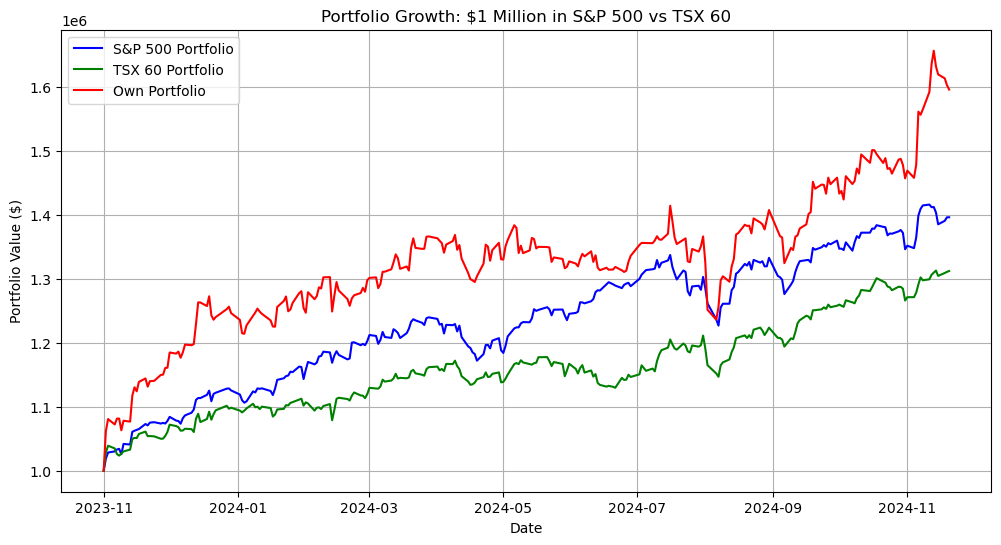

In [16]:
# Define the tickers for S&P 500 and TSX 60
sp500_ticker = "^GSPC"  # S&P 500 Index
tsx60_ticker = "^GSPTSE"  # TSX 60 Index

# Fetch the historical data (we'll use the last year for this example)
start_date = "2023-11-01"
end_date = "2024-11-21"

sp500_data = yf.Ticker(sp500_ticker).history(start=start_date, end=end_date)
tsx60_data = yf.Ticker(tsx60_ticker).history(start=start_date, end=end_date)

# Set the initial investment for each portfolio
initial_investment = 1000000

sp500_data["Portfolio"] = (initial_investment/sp500_data['Close'].iloc[0])*sp500_data['Close']
tsx60_data["Portfolio"] = (initial_investment/tsx60_data['Close'].iloc[0])*tsx60_data['Close']

sp500_data["Portfolio2"] = 0

# Assuming Portfolio_Final is already defined
for i in range(len(Portfolio_Final["Ticker"])):
    ticker = yf.Ticker(Portfolio_Final["Ticker"].iloc[i])
    ticker_hist = ticker.history(start=start_date, end=end_date)
    
    sp500_data["Portfolio2"] += (1000000*Portfolio_Final["Weight"].iloc[i]/100)/(ticker_hist["Close"].iloc[0])*ticker_hist['Close']

# Now align the data based on the common date range
common_dates = sp500_data.index.intersection(tsx60_data.index)

# Reindex both series to ensure they match
sp500_data = sp500_data.loc[common_dates]
tsx60_data = tsx60_data.loc[common_dates]

# Plot the portfolio values
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Portfolio'], label='S&P 500 Portfolio', color='blue')
plt.plot(tsx60_data.index, tsx60_data['Portfolio'], label='TSX 60 Portfolio', color='green')
plt.plot(sp500_data.index, sp500_data['Portfolio2'], label='Own Portfolio', color='red')
plt.title('Portfolio Growth: $1 Million in S&P 500 vs TSX 60')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

Disclaimer: The above code was run with two different test ticker csv's, one which was given to us, and one that was generated randomly with ChatGPT, in these two we saw that over a year, the potfolio we created outperformed the US and Canadian market.

The graph above shows a historical comparison between the two markets we are trying to beat (both the S&P 500 and TSX60), and the portfolio we have built with the stocks from our final portfolio. This tests it historcially over apporximately one year, to confirm that our strategy is pretty effective for beating the market. As seen above, the portfolio we create is pretty responsive to the market itself, when the market falls, the portfolio falls greatly, but when the market is up, it should start to greatly outperform the market.

In [17]:
# Selecting only the 'Ticker' and 'Shares' columns
Stocks_Final = Portfolio_Final[['Ticker','Shares']]

# Exporting the selected stock data to a CSV file
Stocks_Final.to_csv('Stocks_Group_04.csv')